In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV, train_test_split

In [20]:
# Generate 20 random data of 2 features and divide into two classes
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) - [2, 2], np.random.randn(10, 2) + [2, 2]]
Y = [0] * 10 + [1] * 10
X
Y

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

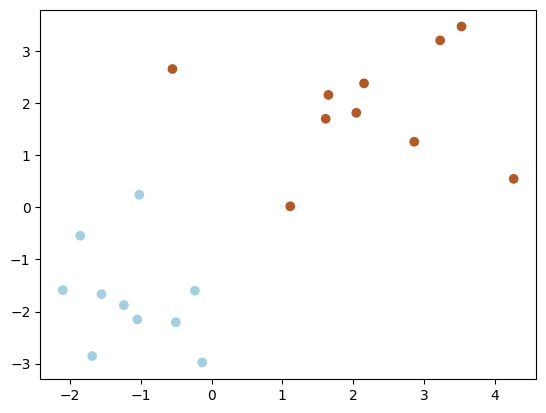

In [21]:
# Plot the data to see if they are linearly separable
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.show()

In [22]:
# Fit the SVC
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, Y)

SVC(C=1, kernel='linear')

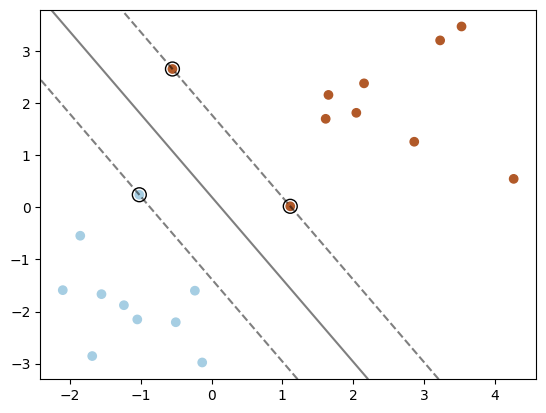

In [23]:
# Plot the SVC
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.show()

In [24]:
# Print the Support vectors
print("Support vectors:\n", clf.support_vectors_)

Support vectors:
 [[-1.02126202  0.2408932 ]
 [-0.55298982  2.6536186 ]
 [ 1.11221425  0.01920353]]


In [25]:
# Reduce the cost parameter and fit the SVC
clf.set_params(C=0.5)
clf.fit(X, Y)

SVC(C=0.5, kernel='linear')

In [26]:
# Perform a grid search using 0.001,0.01,0.1,1,5,10,100 values to get the best values of C
parameters = {'C':[0.001, 0.01, 0.1, 1, 5, 10, 100]}
svc = svm.SVC(kernel='linear')
clf = GridSearchCV(svc, parameters)
clf.fit(X, Y)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]})

In [27]:
# Access the cross-validation errors for each of the values you have given above
print("Cross-validation errors:\n", 1 - clf.cv_results_['mean_test_score'])

Cross-validation errors:
 [0.05 0.05 0.   0.05 0.05 0.05 0.05]


In [28]:
# Identify the best value you got in step 9 for C
print("Best value for C:\n", clf.best_params_)

Best value for C:
 {'C': 0.1}


In [29]:
# Generate a test data set of 20 points
X_test = np.r_[np.random.randn(10, 2) - [2, 2], np.random.randn(10, 2) + [2, 2]]
Y_test = [0] * 10 + [1] * 10
X_test
Y_test

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [30]:
# Predict the class labels for these points – how many are classified properly?
Y_pred = clf.predict(X_test)
print("Number of points classified properly:", sum(Y_test == Y_pred))

Number of points classified properly: 20


In [31]:
# Print the number of support vectors
print("Number of support vectors:", len(clf.best_estimator_.support_vectors_))

Number of support vectors: 6


In [32]:
'''Conclusion of the experiment:

This experiment demonstrates the usage of Support Vector Classifier (SVC) from the sklearn.svm package. We generate a synthetic dataset, fit an SVC, and visualize the decision boundaries.
We also explore the effect of the cost parameter C on the margin and the number of support vectors. A grid search is performed to find the optimal C value.
Finally, we generate a test dataset and evaluate the performance of the SVC. The number of correctly classified points and the number of support vectors are printed.
This experiment provides a practical understanding of how SVC works and how the cost parameter C affects the classifier. '''

'Conclusion of the experiment:\n\nThis experiment demonstrates the usage of Support Vector Classifier (SVC) from the sklearn.svm package. We generate a synthetic dataset, fit an SVC, and visualize the decision boundaries. \nWe also explore the effect of the cost parameter C on the margin and the number of support vectors. A grid search is performed to find the optimal C value. \nFinally, we generate a test dataset and evaluate the performance of the SVC. The number of correctly classified points and the number of support vectors are printed. \nThis experiment provides a practical understanding of how SVC works and how the cost parameter C affects the classifier. '